In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster, linkage, cophenet, dendrogram
from ipywidgets import interact, IntSlider, fixed, FloatSlider


from sklearn.datasets import make_blobs

In [2]:
# test = pd.read_csv("/Users/aptem/Downloads/archive/test.csv") # Загружаем данные
# train = pd.read_csv("/Users/aptem/Downloads/archive/train.csv")
train = pd.read_csv("/Users/aptem/Downloads/archive/test.csv")

In [3]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Class'] = df['Class'].apply(transform_class)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

train = process_data(train)
# test = process_data(test)

In [4]:
features = train.columns.tolist()
target = features.pop(4)
print(target,features)

Class ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [5]:
clusters = range(1,11)
mean = []

In [6]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(train)
    mean.append(sum(np.min(cdist(train, model.cluster_centers_,"euclidean"),axis = 1))/train.shape[0])

Text(0.5, 1.0, 'Elbow method')

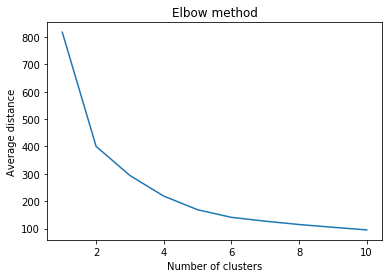

In [7]:
plt.plot(clusters, mean)
plt.xlabel("Number of clusters")
plt.ylabel("Average distance")
plt.title("Elbow method")

In [8]:
kmeans = KMeans(n_clusters = 2).fit(train[features])

In [9]:
adjusted_rand_score(train[target], kmeans.labels_)

0.10977320350654603

In [10]:
stud = linkage(train[features], method = "centroid")
labels = fcluster(stud, 2, criterion = "maxclust")

In [11]:
adjusted_rand_score(train[target], labels)

0.10422871192424929

In [12]:
# dend = dendrogram(stud)

In [13]:
dbscan = DBSCAN(eps = 11, min_samples = 6).fit(train[features])

In [14]:
adjusted_rand_score(train[target], dbscan.labels_)

0.024876094470425957

ValueError: 'c' argument has 500 elements, which is not acceptable for use with 'x' with size 25976, 'y' with size 25976.

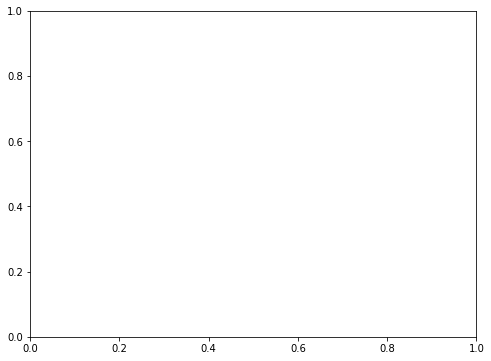

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(train.iloc[:,0],train.iloc[:,1], c=kmeans.labels_.astype(float))